<a href="https://colab.research.google.com/github/Nagasai122/salesprediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from pandas_datareader import data,wb
from datetime import date

# # Start Date means from which date we want to start fetching Stock Data?
# # End Date means till which date we want to fetch Stock Data?
# startdate = pd.to_datetime('2018-01-01')
# enddate = pd.to_datetime(date.today())

# data.DataReader("AAPL",'stooq',startdate, enddate)

In [2]:
import pandas_datareader as pdr

In [3]:
df= pdr.get_data_stooq('AAPL')

In [4]:
df.to_csv('AAPL.csv')

In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2023-01-27,143.155,147.230,143.08,145.93,70555843.0
1,2023-01-26,143.170,144.250,141.90,143.96,54105068.0
2,2023-01-25,140.890,142.430,138.81,141.86,65799349.0
3,2023-01-24,140.305,143.160,140.30,142.53,66435142.0
4,2023-01-23,138.120,143.315,137.90,141.11,81760313.0


In [7]:
df.tail()

,Date,Open,High,Low,Close,Volume
1253,2018-02-05,37.8177,38.9522,37.0819,37.1975,3.038998e+08
1254,2018-02-02,39.4636,39.6500,38.0599,38.1546,3.616853e+08
1255,2018-02-01,39.7418,40.0887,39.6400,39.8833,1.931809e+08
1256,2018-01-31,39.6670,40.0479,39.5753,39.8036,1.357604e+08
1257,2018-01-30,39.3519,39.7886,39.1526,39.6930,1.922561e+08


In [8]:
df.shape

(1258, 6)

In [9]:
df2 = df.reset_index()['Close']

In [10]:
df2.shape

(1258,)

In [11]:
import matplotlib.pyplot as plt

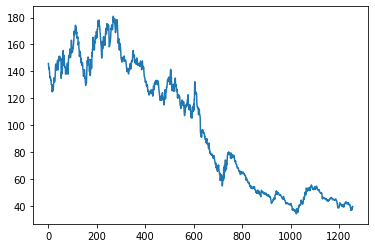

In [12]:
plt.plot(df2)

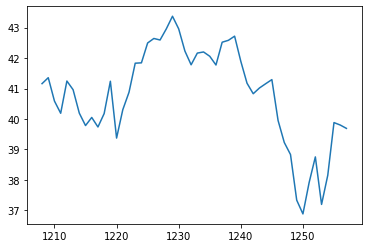

In [13]:
plt.plot(df2[1208:])

In [14]:
## LSTM are sensitive to the scale of data, so we apply Minmax scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df2= scaler.fit_transform(np.array(df2).reshape(-1,1))

In [15]:
df2.shape

(1258, 1)

In [16]:
## splitting data into train and test
training_size = int(len(df2)*.65)
test_size = len(df2)-training_size
train_data,test_data=df2[:training_size,:],df2[training_size:len(df2),:1]

In [17]:
train_data.shape

(817, 1)

In [18]:
test_data.shape

(441, 1)

In [19]:
def create_dataset (dataset,time_step=1):
  dataX, dataY= [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX), np.array(dataY)

In [20]:
time_step=100
X_train,y_train= create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data,time_step)

In [21]:
X_train

array([[0.7611433 , 0.74770983, 0.73338989, ..., 0.81756389, 0.82777879,
        0.81804122],
       [0.74770983, 0.73338989, 0.73795863, ..., 0.82777879, 0.81804122,
        0.82675593],
       [0.73338989, 0.73795863, 0.72827562, ..., 0.81804122, 0.82675593,
        0.84138955],
       ...,
       [0.19261554, 0.18078659, 0.19868652, ..., 0.19933228, 0.1943694 ,
        0.19417846],
       [0.18078659, 0.19868652, 0.17707431, ..., 0.1943694 , 0.19417846,
        0.19480445],
       [0.19868652, 0.17707431, 0.17933209, ..., 0.19417846, 0.19480445,
        0.19200388]])

In [22]:
print(X_train.shape),print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(x_test.shape),print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [24]:
## reshape input to be 3 dim for LSTM (samples, time_step, features)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [25]:
## creating LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 16s 318ms/step - loss: 0.1745 - val_loss: 0.0294
Epoch 2/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0187 - val_loss: 0.0267
Epoch 3/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0110 - val_loss: 0.0102
Epoch 4/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0065 - val_loss: 0.0059
Epoch 5/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 6/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0029 - val_loss: 3.1101e-04
Epoch 7/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0026 - val_loss: 3.5619e-04
Epoch 8/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0025 - val_loss: 3.0429e-04
Epoch 9/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0024 - val_loss: 2.9810e-04
Epoch 10/100
12/12 [==============================] - 2s 200ms/step - loss

In [30]:
## lets do prediction and check performance metrics

train_predict = model.predict(X_train)
test_predict = model.predict(x_test)

11/11 [==============================] - 0s 37ms/step


In [31]:
## transform in original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [32]:
## Train data RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

127.75231436374034

In [33]:
### test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

46.92416635893337

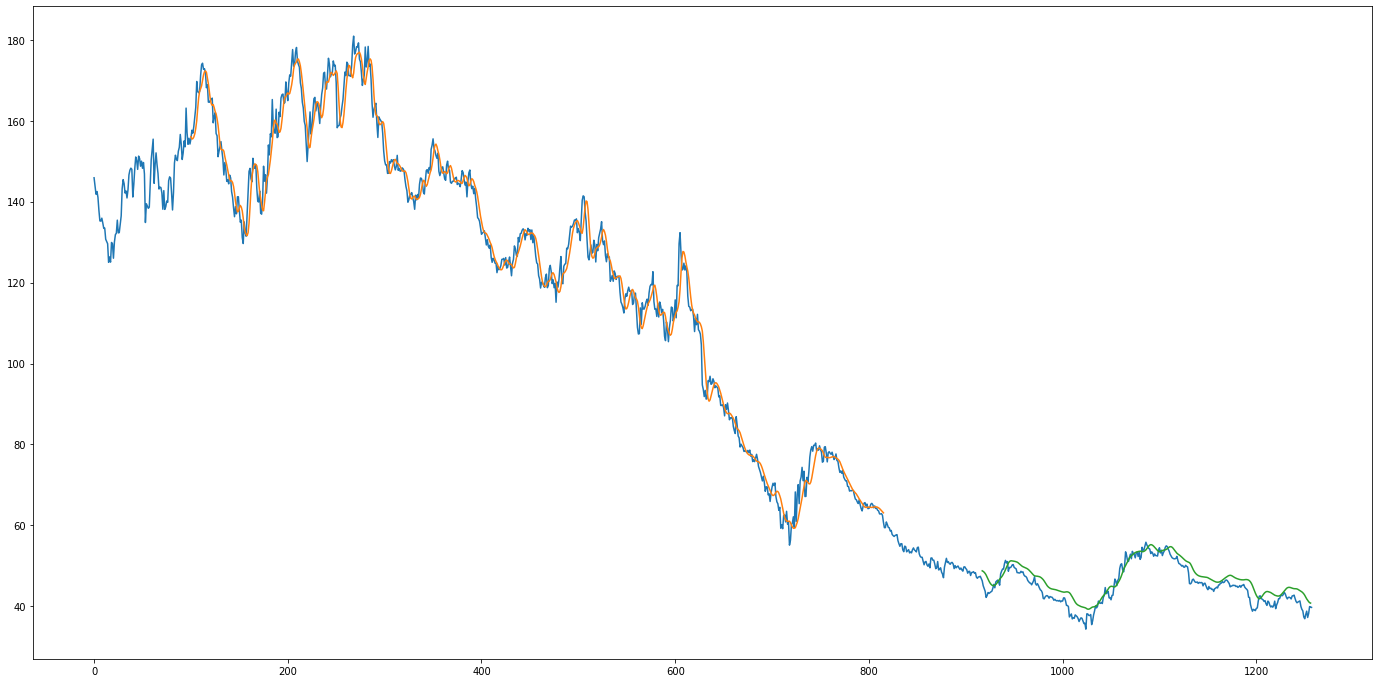

In [34]:
## plotting
plt.figure(figsize=(24,12))
# shift train predict for plotting
look_back=100
trainPredictplot= np.empty_like(df2)
trainPredictplot[:,:]= np.nan
trainPredictplot[look_back:len(train_predict)+look_back,:]= train_predict

# shift test predict for plotting
testPredictplot = np.empty_like(df2)
testPredictplot[:,:] = np.nan
testPredictplot[len(train_predict)+(look_back*2)+1: len(df2)-1,:]=test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictplot)
plt.plot(testPredictplot)

plt.show()


In [49]:
## predicting next 30 days 

len(test_data)

441

In [52]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [53]:
x_input

array([[0.06909101, 0.07075622, 0.06944424, 0.07444803, 0.07460351,
        0.07782004, 0.07765638, 0.08017874, 0.07849922, 0.07928818,
        0.0821433 , 0.08299977, 0.08189236, 0.07949138, 0.07688856,
        0.07136788, 0.07240846, 0.07304059, 0.07417527, 0.073462  ,
        0.07381523, 0.07186431, 0.07262531, 0.07045686, 0.07157245,
        0.07351656, 0.07065393, 0.073462  , 0.07418891, 0.07534542,
        0.07098738, 0.06888644, 0.0674183 , 0.06527645, 0.05393778,
        0.05340726, 0.04129872, 0.035045  , 0.03025873, 0.0333457 ,
        0.03240058, 0.03121066, 0.03501772, 0.03577259, 0.04730901,
        0.05552116, 0.05618056, 0.05222416, 0.05046349, 0.0494645 ,
        0.04672394, 0.04805706, 0.04282209, 0.04009585, 0.04730901,
        0.04536422, 0.04011631, 0.03734233, 0.03915823, 0.0370232 ,
        0.04002766, 0.04726128, 0.03454175, 0.04089095, 0.04479347,
        0.0512995 , 0.05138133, 0.05582733, 0.05683382, 0.05649287,
        0.05896749, 0.06180966, 0.05898113, 0.05

In [54]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [55]:
temp_input

[0.06909101075632498,
 0.07075621587931971,
 0.06944423608544506,
 0.07444803428058641,
 0.07460350797757362,
 0.0778200405595417,
 0.07765638403639727,
 0.08017874019936097,
 0.07849921513059108,
 0.07928817595258328,
 0.08214330037927406,
 0.08299976951706325,
 0.08189236037711925,
 0.07949138280215431,
 0.0768885621819779,
 0.07136788213457204,
 0.07240846486089877,
 0.07304058818154421,
 0.074175273408679,
 0.07346200372864117,
 0.07381522905776125,
 0.07186430692144355,
 0.0726253097540652,
 0.07045686082240135,
 0.07157245278850263,
 0.07351655590302261,
 0.07065393055235439,
 0.07346200372864117,
 0.07418891145227438,
 0.07534541754916177,
 0.07098738071826124,
 0.06888644010239445,
 0.06741830470935287,
 0.06527644996269996,
 0.05393778051750922,
 0.05340726062164933,
 0.04129872361549994,
 0.035044998724842985,
 0.03025872732504778,
 0.033345698492859815,
 0.03240058207170063,
 0.031210662768004632,
 0.03501772263765221,
 0.035772588350655915,
 0.04730900942797958,
 0.05552115

In [56]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.0449235]
101
1 day input [0.07075622 0.06944424 0.07444803 0.07460351 0.07782004 0.07765638
 0.08017874 0.07849922 0.07928818 0.0821433  0.08299977 0.08189236
 0.07949138 0.07688856 0.07136788 0.07240846 0.07304059 0.07417527
 0.073462   0.07381523 0.07186431 0.07262531 0.07045686 0.07157245
 0.07351656 0.07065393 0.073462   0.07418891 0.07534542 0.07098738
 0.06888644 0.0674183  0.06527645 0.05393778 0.05340726 0.04129872
 0.035045   0.03025873 0.0333457  0.03240058 0.03121066 0.03501772
 0.03577259 0.04730901 0.05552116 0.05618056 0.05222416 0.05046349
 0.0494645  0.04672394 0.04805706 0.04282209 0.04009585 0.04730901
 0.04536422 0.04011631 0.03734233 0.03915823 0.0370232  0.04002766
 0.04726128 0.03454175 0.04089095 0.04479347 0.0512995  0.05138133
 0.05582733 0.05683382 0.05649287 0.05896749 0.06180966 0.05898113
 0.05401824 0.05094628 0.05356342 0.05381504 0.05284946 0.05089854
 0.05599713 0.05641922 0.05735002 0.05172092 0.0468194  0.04446752
 0.04575223 0.04670348 0.04762814 

In [57]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [58]:
len(df2)

1258

In [65]:
df2

array([[0.7611433 ],
       [0.74770983],
       [0.73338989],
       ...,
       [0.03800855],
       [0.03746507],
       [0.03671089]])

In [59]:
df3=df2.tolist()
df3.extend(lst_output)

In [60]:
import matplotlib.pyplot as plt

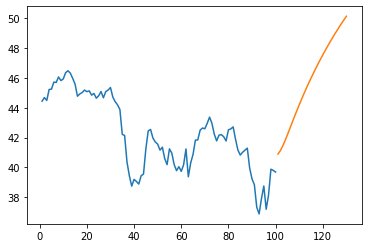

In [61]:
plt.plot(day_new,scaler.inverse_transform(df2[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [63]:
df3=scaler.inverse_transform(df3).tolist()

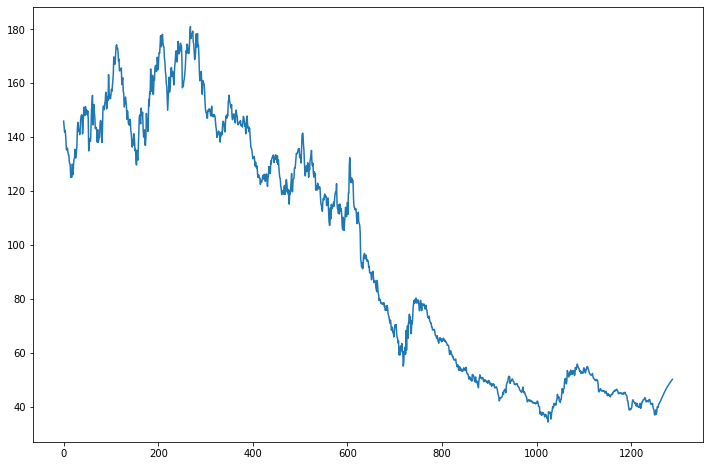

In [68]:
plt.figure(figsize=(12,8))
plt.plot(df3)